# Focused on MulticlassClassification

`on 10 classes`
1. Become one with data
2. preprocess the data (get it ready for a model)
3. create a model(Start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evalute the model
6. Adjust different hypterparameters and improve the model(Try to beat baseline/ reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with data


In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", 'r')
zip_ref.extractall()
zip_ref.close()

--2024-04-13 09:32:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c06::cf, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  72.0MB/s    in 6.9s    

2024-04-13 09:32:11 (71.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} at {dirpath}")

There are 2 directories and 0 at 10_food_classes_all_data
There are 10 directories and 0 at 10_food_classes_all_data/train
There are 0 directories and 750 at 10_food_classes_all_data/train/pizza
There are 0 directories and 750 at 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 at 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 at 10_food_classes_all_data/train/sushi
There are 0 directories and 750 at 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 at 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 at 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 at 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 at 10_food_classes_all_data/train/ramen
There are 0 directories and 750 at 10_food_classes_all_data/train/steak
There are 10 directories and 0 at 10_food_classes_all_data/test
There are 0 directories and 250 at 10_food_classes_all_

In [3]:
# set up the train and test directories
test_dir = "10_food_classes_all_data/test"
train_dir = "10_food_classes_all_data/train"

In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
#visvualize the data
import matplotlib.pyplot as plt
import random
def random_images_plot(dirpath, subdir, no_of_images = 10, figsize = (20, 20)):

    subdirpath = os.path.join(dirpath, subdir)
    images = random.sample(os.listdir(subdirpath), no_of_images)
    plt.figure(figsize = figsize)
    plt.suptitle(subdir)
    for i in range(no_of_images):
      plt.subplot(3, int(np.ceil(no_of_images/3)), i+1)
      img = plt.imread(os.path.join(subdirpath, images[i]))
      plt.title(f"filename : {images[i]}\n shape: {img.shape}")
      plt.imshow(img)
      plt.axis('off')

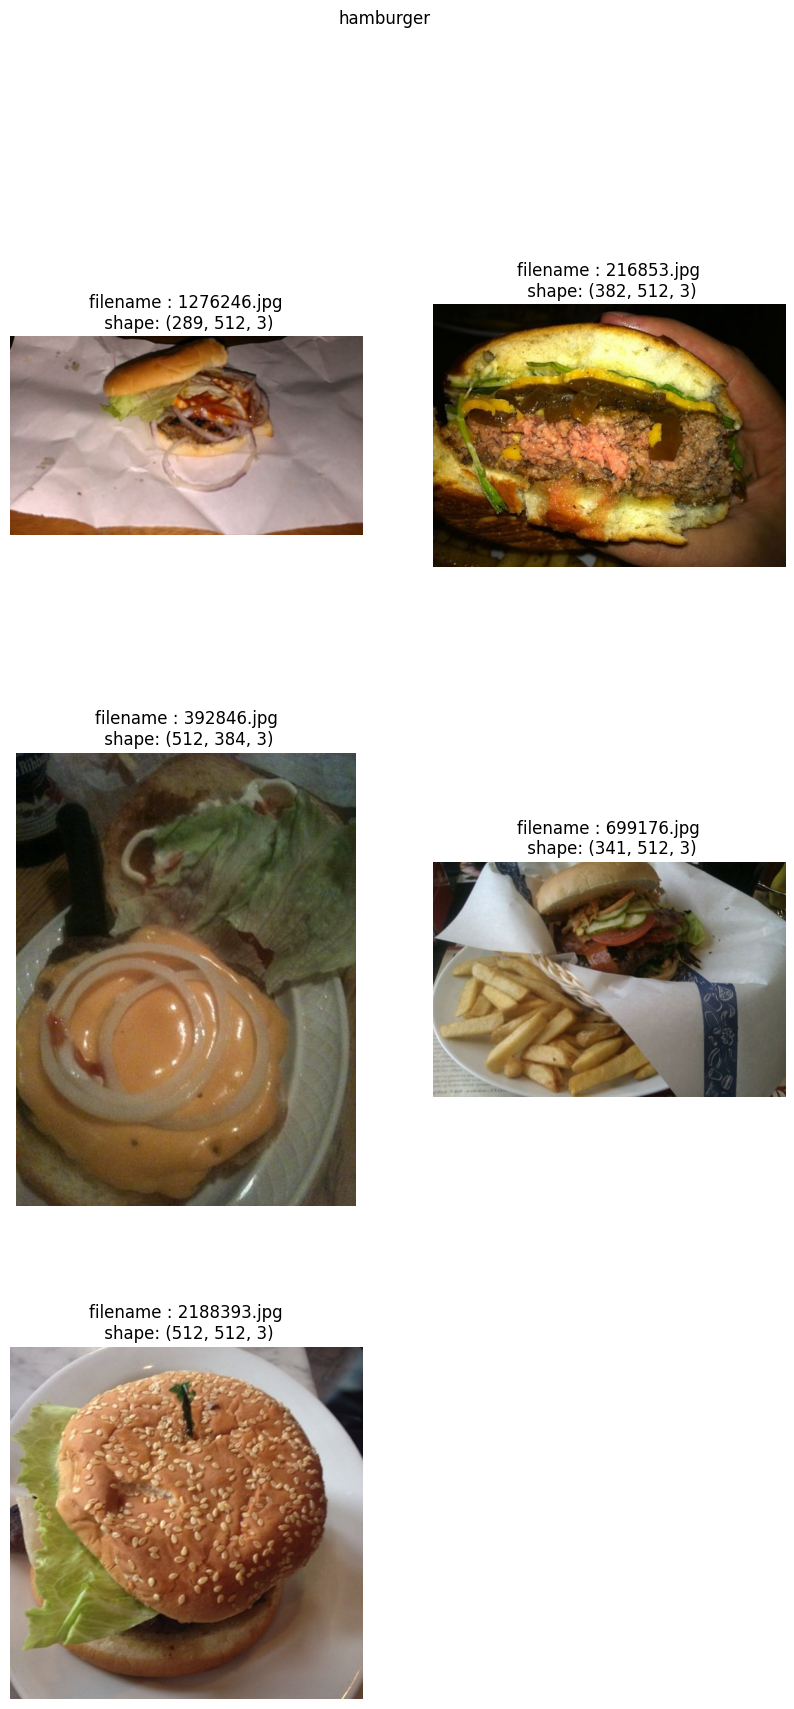

In [6]:
random_images_plot(train_dir, random.choice(class_names), figsize = (10, 20), no_of_images= 5)

## 2. Preprocess the data

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# load data
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses  import CategoricalCrossentropy
from tensorflow.keras.utils import plot_model

In [ ]:
model_1 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation = 'softmax')
])

In [ ]:
model_1.compile(loss = CategoricalCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])
history_1 = model_1.fit(train_data,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        epochs = 5)

Epoch 1/5
235/235 [==============================] - 39s 154ms/step - loss: 2.2090 - accuracy: 0.1761 - val_loss: 2.0708 - val_accuracy: 0.2488
Epoch 2/5
235/235 [==============================] - 33s 139ms/step - loss: 1.9299 - accuracy: 0.3201 - val_loss: 1.9423 - val_accuracy: 0.3292
Epoch 3/5
235/235 [==============================] - 34s 144ms/step - loss: 1.5935 - accuracy: 0.4579 - val_loss: 1.9249 - val_accuracy: 0.3384
Epoch 4/5
235/235 [==============================] - 33s 138ms/step - loss: 1.0555 - accuracy: 0.6596 - val_loss: 2.2706 - val_accuracy: 0.3200
Epoch 5/5
235/235 [==============================] - 30s 127ms/step - loss: 0.4840 - accuracy: 0.8517 - val_loss: 3.2406 - val_accuracy: 0.3064


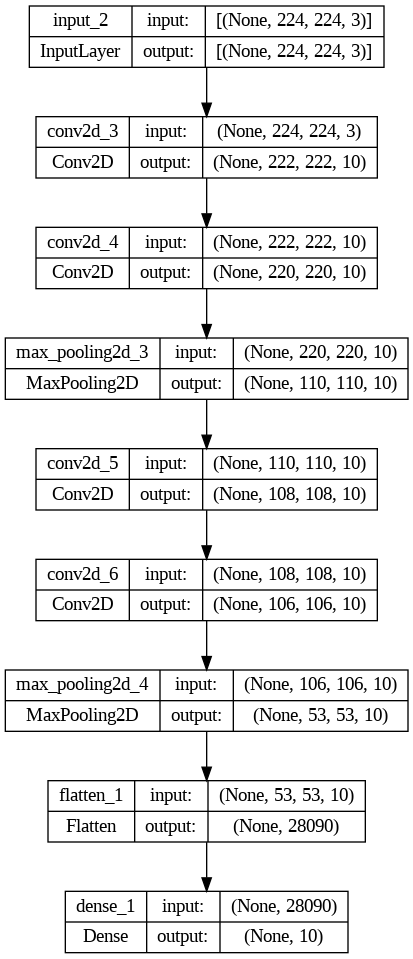

In [ ]:
plot_model(model_1, show_shapes = True)

<Axes: >

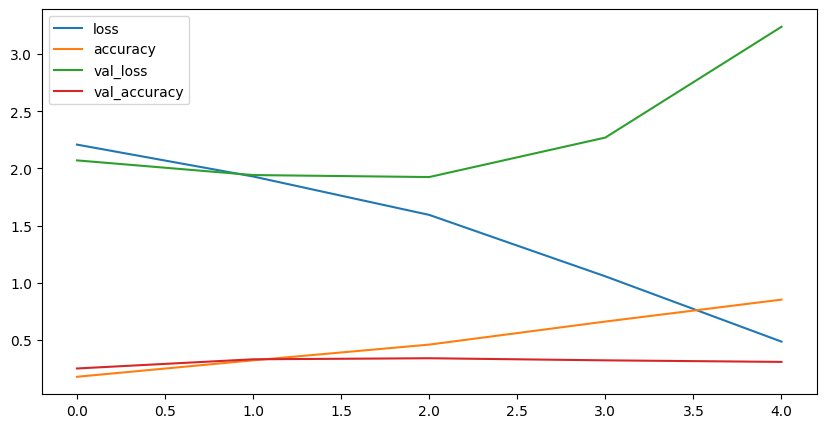

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize = (10, 5))

## 5. Evaluate the model

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 8s 104ms/step - loss: 3.2406 - accuracy: 0.3064


[3.2406160831451416, 0.30640000104904175]

## 6. Adjust the model hyperparameter and bit baseline

In [ ]:
model_2 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_2.compile(loss= CategoricalCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data),
            epochs = 5)

Epoch 1/5
235/235 [==============================] - 37s 154ms/step - loss: 2.0763 - accuracy: 0.2667 - val_loss: 1.8885 - val_accuracy: 0.3384
Epoch 2/5
235/235 [==============================] - 27s 116ms/step - loss: 1.6703 - accuracy: 0.4437 - val_loss: 1.8373 - val_accuracy: 0.3428
Epoch 3/5
235/235 [==============================] - 30s 127ms/step - loss: 1.3009 - accuracy: 0.5893 - val_loss: 1.8621 - val_accuracy: 0.3608
Epoch 4/5
235/235 [==============================] - 40s 172ms/step - loss: 0.8670 - accuracy: 0.7365 - val_loss: 2.2700 - val_accuracy: 0.3080
Epoch 5/5
235/235 [==============================] - 50s 213ms/step - loss: 0.4934 - accuracy: 0.8719 - val_loss: 2.3710 - val_accuracy: 0.3336


<Axes: >

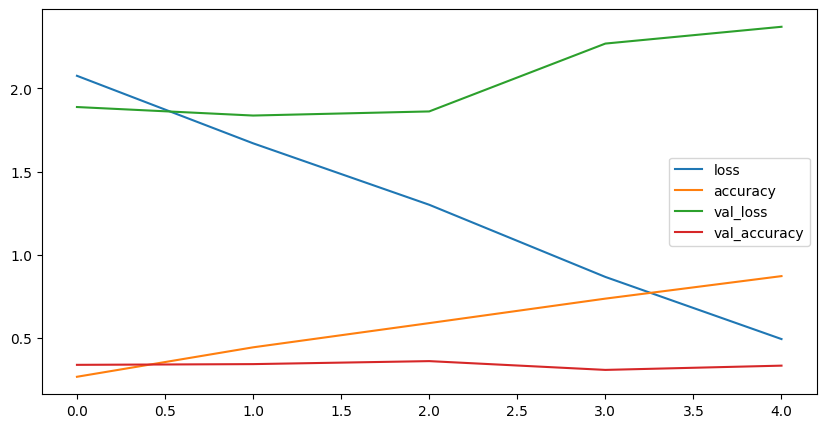

In [ ]:
pd.DataFrame(history_2.history).plot(figsize = (10, 5))

## 8. reduce overfitting by data Augmentation

In [10]:
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             zoom_range = 0.2,
                                             shear_range = 0.2,
                                             rotation_range = 0.2,
                                             height_shift_range= 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   class_mode = 'categorical',
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   shuffle = True)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             shuffle = True,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [13]:
import tensorflow as tf
model_3 = tf.keras.models.clone_model(model_2)

model_3.compile(loss = CategoricalCrossentropy(),
                optimizer = Adam(),
                metrics= ['accuracy'])
history_3 = model_3.fit(train_data_augmented,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data),
            epochs= 5)

Epoch 1/5
235/235 [==============================] - 122s 510ms/step - loss: 2.1592 - accuracy: 0.2224 - val_loss: 1.9918 - val_accuracy: 0.2904
Epoch 2/5
235/235 [==============================] - 101s 429ms/step - loss: 1.9971 - accuracy: 0.2973 - val_loss: 1.9149 - val_accuracy: 0.3280
Epoch 3/5
235/235 [==============================] - 100s 428ms/step - loss: 1.9398 - accuracy: 0.3264 - val_loss: 1.8536 - val_accuracy: 0.3608
Epoch 4/5
235/235 [==============================] - 101s 427ms/step - loss: 1.8929 - accuracy: 0.3456 - val_loss: 1.8277 - val_accuracy: 0.3612
Epoch 5/5
235/235 [==============================] - 106s 452ms/step - loss: 1.8512 - accuracy: 0.3677 - val_loss: 1.7798 - val_accuracy: 0.3808


<Axes: >

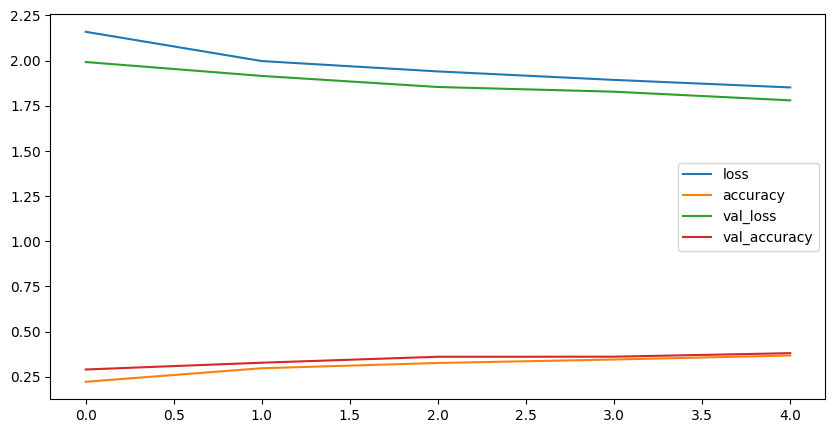

In [14]:
import pandas as pd
pd.DataFrame(history_3.history).plot(figsize= (10, 5))

In [15]:
model_3.evaluate(test_data)

79/79 [==============================] - 7s 86ms/step - loss: 1.7798 - accuracy: 0.3808


[1.7797646522521973, 0.3808000087738037]

## 7. Repeat until satisfied
`Create final model`
**Can we use Transfer learning**

In [17]:
model_4 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(32, 3, activation = 'relu'),
    Conv2D(32, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(16, 3, activation = 'relu'),
    Conv2D(16, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model_4.compile(loss = CategoricalCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])


EarlyStoping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                patience = 3)
model_4.fit(train_data_augmented,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data),
            epochs = 10,
            callbacks = [EarlyStoping])

Epoch 1/10
235/235 [==============================] - 117s 471ms/step - loss: 2.2997 - accuracy: 0.1096 - val_loss: 2.2608 - val_accuracy: 0.1652
Epoch 2/10
235/235 [==============================] - 107s 454ms/step - loss: 2.2261 - accuracy: 0.1791 - val_loss: 2.1333 - val_accuracy: 0.2368
Epoch 3/10
235/235 [==============================] - 107s 456ms/step - loss: 2.1252 - accuracy: 0.2396 - val_loss: 2.0391 - val_accuracy: 0.2644
Epoch 4/10
235/235 [==============================] - 107s 454ms/step - loss: 2.0526 - accuracy: 0.2689 - val_loss: 1.9844 - val_accuracy: 0.2956
Epoch 5/10
235/235 [==============================] - 108s 461ms/step - loss: 2.0047 - accuracy: 0.2964 - val_loss: 1.9494 - val_accuracy: 0.3228
Epoch 6/10
235/235 [==============================] - 107s 455ms/step - loss: 1.9668 - accuracy: 0.3129 - val_loss: 1.8812 - val_accuracy: 0.3448
Epoch 7/10
235/235 [==============================] - 107s 454ms/step - loss: 1.9214 - accuracy: 0.3380 - val_loss: 1.8354 -

In [18]:
model_4.evaluate(test_data)

79/79 [==============================] - 9s 115ms/step - loss: 1.7759 - accuracy: 0.3988


[1.7758569717407227, 0.39879998564720154]

## Making prediction with our trained model

In [19]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [20]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [38]:
# Make prediction using model_4

def pred_and_plot(path, class_names = class_names, model= model_4):
  img = plt.imread(path)
  img = img/255.
  img = tf.keras.preprocessing.image.smart_resize(img, (224, 224))
  y_pred = model.predict(tf.expand_dims(img, axis = 0))
  plt.title(class_names[tf.argmax(y_pred, axis = 1).numpy()[0]])
  plt.imshow(img)


1/1 [==============================] - 0s 20ms/step


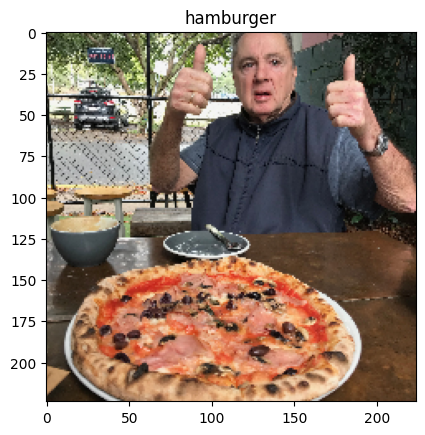

In [39]:
pred_and_plot('03-pizza-dad.jpeg')

1/1 [==============================] - 0s 27ms/step


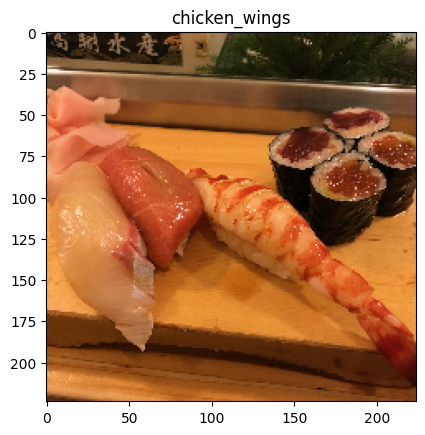

In [40]:
pred_and_plot('03-sushi.jpeg')

1/1 [==============================] - 0s 30ms/step


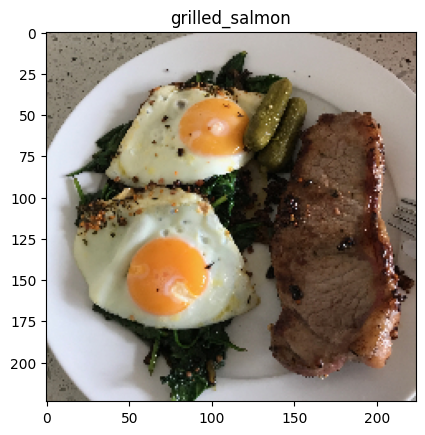

In [42]:
pred_and_plot('03-steak.jpeg')

1/1 [==============================] - 0s 17ms/step


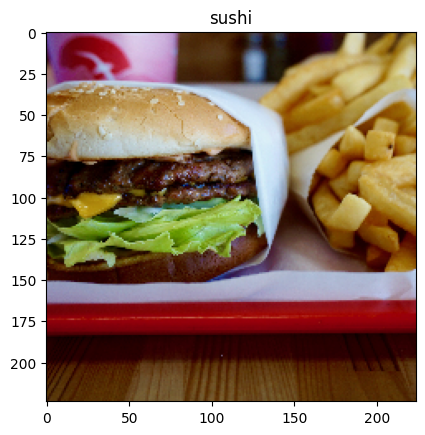

In [43]:
pred_and_plot('03-hamburger.jpeg')

We will try to improve it over more data and more complex dataset

## SAve and Load model

In [44]:
model_4.save("Saved_trained_model_4.keras")

In [45]:
loaded_model = tf.keras.models.load_model("Saved_trained_model_4.keras")

In [47]:
loaded_model.evaluate(test_data)

79/79 [==============================] - 11s 136ms/step - loss: 1.7759 - accuracy: 0.3988


[1.7758569717407227, 0.39879998564720154]

In [48]:
model_4.evaluate(test_data)

79/79 [==============================] - 7s 91ms/step - loss: 1.7759 - accuracy: 0.3988


[1.7758569717407227, 0.39879998564720154]